### 1 - PREPARAÇÃO E CARREGAMENTO DOS DADOS ###

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
try:
    df = pd.read_csv("flight_data_2024.csv")
    print("Arquivo carregado com sucesso!")

except FileNotFoundError:
    print("ERRO: Arquivo não encontrado")

print(f"Dataset carregado com {df.shape[0]} linhas e {df.shape[1]} colunas.")

Arquivo carregado com sucesso!
Dataset carregado com 200817 linhas e 18 colunas.


### 2 - INSPEÇÃO E QUALIDADE DOS DADOS ###

In [4]:
print("\n --- 2.1. Primeiras linhas ---")
display(df.head())


 --- 2.1. Primeiras linhas ---


,year,month,day_of_month,day_of_week,fl_date,origin,origin_city_name,origin_state_nm,dep_time,taxi_out,wheels_off,wheels_on,taxi_in,cancelled,air_time,distance,weather_delay,late_aircraft_delay
0,2024,1,1,1,1/1/2024,JFK,"New York, NY",New York,1247.0,31.0,1318.0,1442.0,7.0,0.0,84.0,509.0,0.0,0.0
1,2024,1,1,1,1/1/2024,MSP,"Minneapolis, MN",Minnesota,1001.0,20.0,1021.0,1249.0,6.0,0.0,88.0,622.0,0.0,0.0
2,2024,1,1,1,1/1/2024,JFK,"New York, NY",New York,1411.0,21.0,1432.0,1533.0,8.0,0.0,61.0,288.0,0.0,0.0
3,2024,1,1,1,1/1/2024,RIC,"Richmond, VA",Virginia,1643.0,13.0,1656.0,1747.0,12.0,0.0,51.0,288.0,0.0,0.0
4,2024,1,1,1,1/1/2024,DTW,"Detroit, MI",Michigan,1010.0,21.0,1031.0,1016.0,4.0,0.0,45.0,237.0,0.0,0.0


In [5]:
try:
    df['flight_id'] = np.arange(df.shape[0]) + 1
    colunas = ['flight_id'] + [col for col in df.columns if col != 'flight_id']
    df = df[colunas]

    print(f"\n Coluna 'flight_id' criada com sucesso!")
    print(f"Total de {df.shape[0]:,} voos.")

    print("\n ---- 5 primeiras linhas do df com o ID novo ----")
    print(df[['flight_id', 'fl_date', 'origin', 'cancelled']].head(5))

except Exception as e:
    print(f"ocorreu um erro inesperado: {e}")


 Coluna 'flight_id' criada com sucesso!
Total de 200,817 voos.

 ---- 5 primeiras linhas do df com o ID novo ----
   flight_id   fl_date origin  cancelled
0          1  1/1/2024    JFK        0.0
1          2  1/1/2024    MSP        0.0
2          3  1/1/2024    JFK        0.0
3          4  1/1/2024    RIC        0.0
4          5  1/1/2024    DTW        0.0


In [ ]:
print(f"--- Descrição dos dados ---")
display(df.describe().T)

--- Descrição dos dados ---


,count,mean,std,min,25%,50%,75%,max
flight_id,1048575.0,524288.000000,302697.673595,1.0,262144.5,524288.0,786431.5,1048575.0
year,1048575.0,2024.000000,0.000000,2024.0,2024.0,2024.0,2024.0,2024.0
month,1048575.0,1.478081,0.499520,1.0,1.0,1.0,2.0,2.0
day_of_month,1048575.0,15.305120,8.585503,1.0,8.0,15.0,23.0,31.0
day_of_week,1048575.0,3.893483,2.010038,1.0,2.0,4.0,6.0,7.0
dep_time,1026022.0,1325.073671,497.299032,1.0,911.0,1323.0,1736.0,2400.0
taxi_out,1025450.0,18.250121,10.440251,1.0,12.0,15.0,21.0,213.0
wheels_off,1025450.0,1349.995608,498.042601,1.0,929.0,1337.0,1750.0,2400.0
wheels_on,1024898.0,1476.155761,519.868238,1.0,1058.0,1510.0,1914.0,2400.0
taxi_in,1024898.0,8.082517,6.512591,1.0,4.0,6.0,9.0,444.0


In [6]:
print("\n --- 2.3. Contagem de valores nulos ---")
nulos = df.isnull().sum().sort_values(ascending=False)
nulos_percentual = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
df_nulos = pd.DataFrame({'Nulos': nulos, 'Percentual': nulos_percentual})
print(df_nulos[df_nulos['Nulos'] > 0]) # Exibe apenas colunas com nulos


 --- 2.3. Contagem de valores nulos ---
                     Nulos  Percentual
air_time              5006    2.492817
wheels_on             4433    2.207482
taxi_in               4433    2.207482
wheels_off            4333    2.157686
taxi_out              4333    2.157686
dep_time              4183    2.082991
late_aircraft_delay      1    0.000498
weather_delay            1    0.000498
distance                 1    0.000498
origin_state_nm          1    0.000498
cancelled                1    0.000498


In [7]:
voos_cancelados = df[df['cancelled'] == 1].copy()
cidades_distintas = voos_cancelados['origin_city_name'].dropna().unique().tolist()
total_cidades = len(cidades_distintas)
total_cancelamentos = voos_cancelados['cancelled'].sum()

print(f'O total de cidades de origem distinctas: {total_cidades}')
print(f'O total de Voos cancelados é: {total_cancelamentos}')


O total de cidades de origem distinctas: 217
O total de Voos cancelados é: 4360.0


/tmp/ipython-input-3441574223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contagem_mensal.index, y=contagem_mensal.values, palette="viridis")


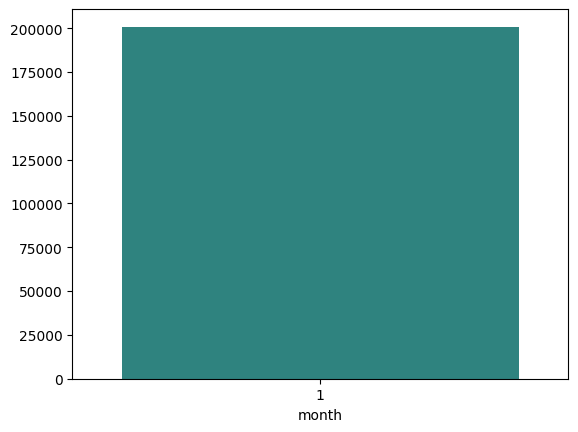

In [8]:
# 2. Contagem das Observações por Mês
    # value_counts() conta a frequência e sort_index() garante a ordem correta dos meses (1, 2, 3...)
contagem_mensal = df['month'].value_counts().sort_index()

# 3. Criação do Gráfico de Barras
ax = sns.barplot(x=contagem_mensal.index, y=contagem_mensal.values, palette="viridis")



 --- Gerando Gráfico: TOP 15 cidades por número de cancelamentos ---


/tmp/ipython-input-2442239277.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_voos_cancelados = sns.barplot(


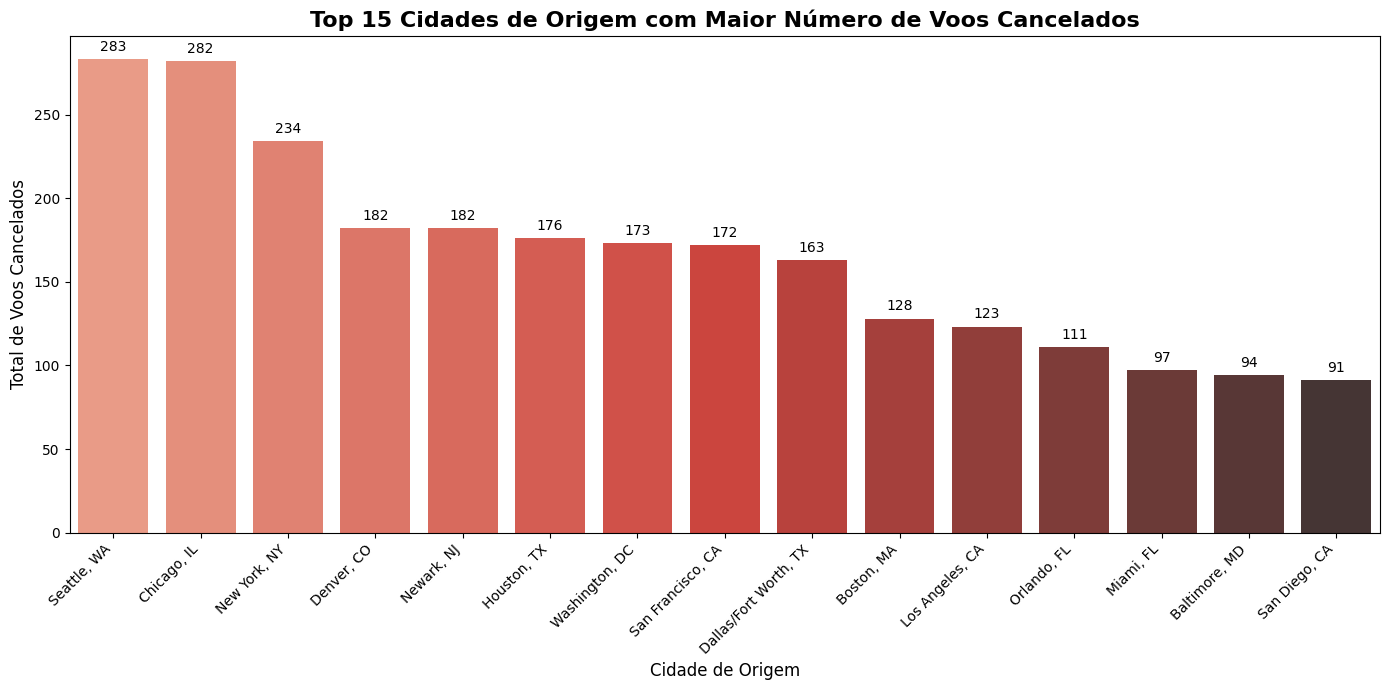

In [9]:
cancelamentos_por_cidade = (
    df.groupby('origin_city_name')['cancelled'].sum().sort_values(ascending=False)
)

cidades_com_mais_cancelamentos = cancelamentos_por_cidade.head(15)
print(f"\n --- Gerando Gráfico: TOP 15 cidades por número de cancelamentos ---")

#mplt.figure(figsize=(14, 7))
plt.figure(figsize=(14,7))
grafico_voos_cancelados = sns.barplot(
    x=cidades_com_mais_cancelamentos.index,
    y=cidades_com_mais_cancelamentos.values,
    palette="Reds_d"
)

# Adicionando Títulos e Rótulos
plt.title('Top 15 Cidades de Origem com Maior Número de Voos Cancelados', fontsize=16, fontweight='bold')
plt.xlabel('Cidade de Origem', fontsize=12)
plt.ylabel('Total de Voos Cancelados', fontsize=12)
plt.xticks(rotation=45, ha='right')

    # Linhas que faltam para finalizar: Adicionar anotações e exibir

    # 1. Adicionar os valores exatos em cima de cada barra (como fizemos antes)
for p in grafico_voos_cancelados.patches:
        grafico_voos_cancelados.annotate(f'{int(p.get_height()):,}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    # 2. Ajustar o layout
plt.tight_layout()

    # 3. Exibir o gráfico!
plt.show()

In [10]:
df['total_minutos_atraso'] = df['weather_delay'] + df['late_aircraft_delay']
df['flag_atrasado'] = (df['total_minutos_atraso'] > 15).astype(int)
total_voos_atrasados = df['flag_atrasado'].sum()
print(f"O total de Voos atrasados é: {total_voos_atrasados}")

O total de Voos atrasados é: 19211



 Gerando gráfico das TOP 15 cidades com mais atrasos


/tmp/ipython-input-1615281375.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico_voos_atrasados = sns.barplot(


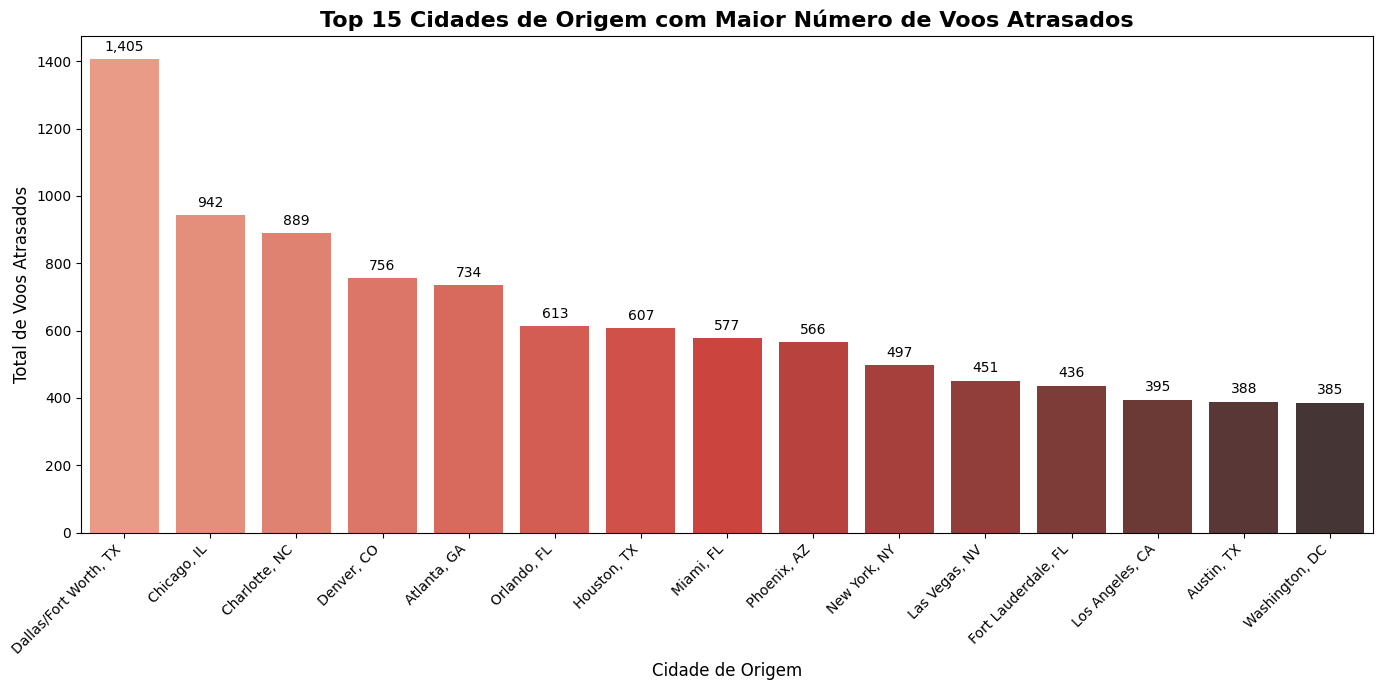

In [11]:
atrasos_por_cidade = (
    df.groupby('origin_city_name')['flag_atrasado'].sum().sort_values(ascending=False)
    )

cidades_com_mais_atrasos = atrasos_por_cidade.head(15)
print(f"\n Gerando gráfico das TOP 15 cidades com mais atrasos")

plt.figure(figsize=(14, 7))
grafico_voos_atrasados = sns.barplot(
    x=cidades_com_mais_atrasos.index,
    y=cidades_com_mais_atrasos.values,
    palette="Reds_d"
)

# Adicionando Títulos e Rótulos
plt.title('Top 15 Cidades de Origem com Maior Número de Voos Atrasados', fontsize=16, fontweight='bold')
plt.xlabel('Cidade de Origem', fontsize=12)
plt.ylabel('Total de Voos Atrasados', fontsize=12)
plt.xticks(rotation=45, ha='right')

    # Linhas que faltam para finalizar: Adicionar anotações e exibir

    # 1. Adicionar os valores exatos em cima de cada barra (como fizemos antes)
for p in grafico_voos_atrasados.patches:
        grafico_voos_atrasados.annotate(f'{int(p.get_height()):,}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    # 2. Ajustar o layout
plt.tight_layout()

    # 3. Exibir o gráfico!
plt.show()

In [12]:
# Agrupa pela cidade e aplica as funções de agregação necessárias
df_resumo_cidade = df.groupby('origin_city_name').agg(
        # 1. Quantidade de Voos Agendados (simplesmente a contagem de observações)
        quantidade_voos_agendados=('year', 'count'),

        # 2. Quantidade de Voos Atrasados (soma do nosso indicador binário)
        quantidade_voos_atrasados=('flag_atrasado', 'sum'),

        # 4. Quantidade de Voos Cancelados (soma da coluna 'cancelled')
        quantidade_voos_cancelados=('cancelled', 'sum')

    ).reset_index() # Transforma o índice 'origin_city_name' em uma coluna

df_resumo_cidade['prop_atrasados'] = (
    df_resumo_cidade['quantidade_voos_atrasados'] / df_resumo_cidade['quantidade_voos_agendados']
)

df_resumo_cidade['prop_cancelados'] = (
    df_resumo_cidade['quantidade_voos_cancelados'] / df_resumo_cidade['quantidade_voos_agendados']
)

df_resumo_cidade = df_resumo_cidade.sort_values(
    by='quantidade_voos_agendados', ascending=False
)

df_resumo_cidade['prop_atrasados'] = df_resumo_cidade['prop_atrasados'].map('{:.2%}'.format)
df_resumo_cidade['prop_cancelados'] = df_resumo_cidade['prop_cancelados'].map('{:.2%}'.format)

print(f"Novo Dataframe criado com sucesso! Abaixo as top 15 cidades por volume de voos agendados")
display(df_resumo_cidade.head(15))

Novo Dataframe criado com sucesso! Abaixo as top 15 cidades por volume de voos agendados


,origin_city_name,quantidade_voos_agendados,quantidade_voos_atrasados,quantidade_voos_cancelados,prop_atrasados,prop_cancelados
61,"Chicago, IL",9779,942,282.0,9.63%,2.88%
18,"Atlanta, GA",9247,734,58.0,7.94%,0.63%
77,"Dallas/Fort Worth, TX",8909,1405,163.0,15.77%,1.83%
82,"Denver, CO",8707,756,182.0,8.68%,2.09%
211,"New York, NY",7580,497,234.0,6.56%,3.09%
57,"Charlotte, NC",6119,889,72.0,14.53%,1.18%
233,"Phoenix, AZ",6030,566,71.0,9.39%,1.18%
181,"Los Angeles, CA",5647,395,123.0,6.99%,2.18%
170,"Las Vegas, NV",5593,451,71.0,8.06%,1.27%
316,"Washington, DC",5319,385,173.0,7.24%,3.25%


### Inferencias iniciais ###

- O Dataset refere-se ao histórico de voos de 2024, porém só possui informações de vôos nos meses de Janeiro e Fevereiro (1 e 2);
- As informaçoes nulas do dataset se concentram nas variáveis associadas a tempo.
-

Dataset pronto. X: 200817 linhas, 391 features.

--- Treinando Modelo de Regressão Logística ---

✅ RESULTADOS DA REGRESSÃO LOGÍSTICA (PREVISÃO DE CANCELAMENTO)
Acurácia: 0.9999

Relatório de Classificação (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58938
           1       1.00      1.00      1.00      1308

    accuracy                           1.00     60246
   macro avg       1.00      1.00      1.00     60246
weighted avg       1.00      1.00      1.00     60246


Matriz de Confusão (real vs. previsto):


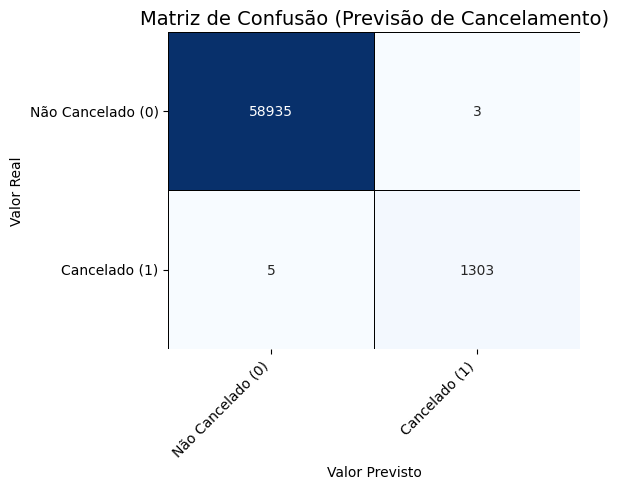


*Lembre-se: Para a Classe 1 (Cancelados), o Recall é geralmente a métrica mais importante!*


In [29]:
coluna_alvo = 'cancelled'

df[coluna_alvo]=pd.to_numeric(df[coluna_alvo], errors='coerce').fillna(0).astype(int)

# c) Preparação de Variáveis Numéricas (taxiamento)
df['taxi_out'] = pd.to_numeric(df['taxi_out'], errors='coerce').fillna(0)

# d) Criação de Features de Tempo (data)
df['fl_date'] = pd.to_datetime(df['fl_date'], errors='coerce')
df['day_of_year'] = df['fl_date'].dt.dayofyear
df['week_of_year'] = df['fl_date'].dt.isocalendar().week.astype(int)

# e) Codificação de Variáveis Categóricas (One-Hot Encoding)
colunas_para_dummies = ['origin', 'origin_state_nm']
df_para_regressao_logistica = pd.get_dummies(df, columns=colunas_para_dummies, drop_first=True)

# f) Remoção de colunas que não podem ser Features
colunas_para_remover = [
        'fl_date',
        'origin_city_name',
        'flight_id' # NUNCA use IDs como features preditoras!
    ]
df_para_regressao_logistica.drop(columns=colunas_para_remover, inplace=True, errors='ignore')

# 2. Definição de X e Y

Y = df_para_regressao_logistica[coluna_alvo]
X = df_para_regressao_logistica.drop(columns=[coluna_alvo])

# Tratamento final de X: Remover colunas com NaN ou Infinitos
X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

print(f"Dataset pronto. X: {X.shape[0]} linhas, {X.shape[1]} features.")

# 3. Divisão Treino e Teste (usando stratify para manter a proporção de cancelamentos)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

print("\n--- Treinando Modelo de Regressão Logística ---")

# 4. Treinamento do Modelo
model = LogisticRegression(solver='liblinear', random_state=1, max_iter=1000)
model.fit(X_train, Y_train)

# 5. Previsão e Avaliação
Y_pred = model.predict(X_test)

print("\n=======================================================")
print("✅ RESULTADOS DA REGRESSÃO LOGÍSTICA (PREVISÃO DE CANCELAMENTO)")
print("=======================================================")

# Métricas de Desempenho
print(f"Acurácia: {accuracy_score(Y_test, Y_pred):.4f}")
print("\nRelatório de Classificação (Precision, Recall, F1-Score):")
# zero_division=0 evita o warning se uma classe não for prevista
print(classification_report(Y_test, Y_pred, zero_division=0))
print("\nMatriz de Confusão (real vs. previsto):")

cm = confusion_matrix(Y_test, Y_pred)

# 2. Configuração da Visualização
plt.figure(figsize=(6, 5))

# Criar o Heatmap (Mapa de Calor)
sns.heatmap(
    cm,
    annot=True,              # Mostrar os números dentro dos quadrados
    fmt='d',                 # Formatar os números como inteiros
    cmap='Blues',            # Escolher um esquema de cores (Azul é um bom padrão)
    linewidths=0.5,          # Linhas entre os quadrados
    linecolor='black',
    cbar=False               # Não mostrar a barra de cores lateral
)

# 3. Adicionar Rótulos e Títulos
# Os rótulos 0 e 1 correspondem a 'Não Cancelado' e 'Cancelado'
class_names = ['Não Cancelado (0)', 'Cancelado (1)']
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45, ha='right')
plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=0)

plt.title('Matriz de Confusão (Previsão de Cancelamento)', fontsize=14)
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')

plt.tight_layout()
plt.show()

print("\n*Lembre-se: Para a Classe 1 (Cancelados), o Recall é geralmente a métrica mais importante!*")




--- Treinando Modelo de Árvore de Decisão ---

✅ RESULTADOS DA ÁRVORE DE DECISÃO (PREVISÃO DE CANCELAMENTO)
Acurácia: 0.9994

Relatório de Classificação (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58938
           1       0.98      1.00      0.99      1308

    accuracy                           1.00     60246
   macro avg       0.99      1.00      0.99     60246
weighted avg       1.00      1.00      1.00     60246


Matriz de Confusão (real vs. previsto):


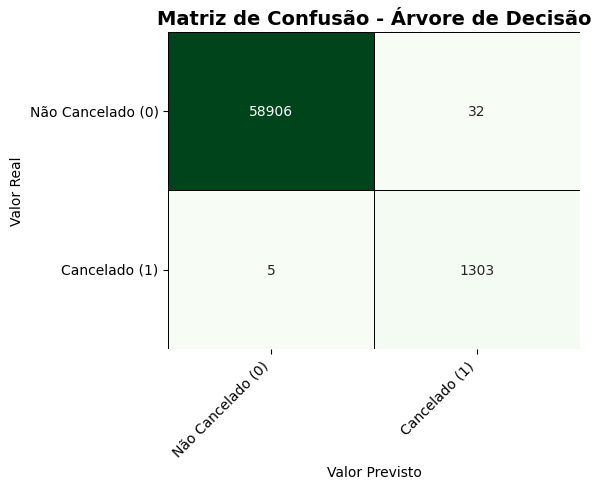


🚨 Compare o canto Inferior Esquerdo (Falsos Negativos) com o modelo Logístico.
O modelo com o menor número nessa célula é o melhor para a segurança operacional!


In [33]:
# 3. Divisão Treino e Teste (usando 70/30 e random_state para consistência)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

print("\n--- Treinando Modelo de Árvore de Decisão ---")

    # 4. Treinamento do Modelo (Parâmetros iniciais: max_depth limita o crescimento da árvore)
model_tree = DecisionTreeClassifier(
        max_depth=5,        # Limita a profundidade para evitar Overfitting e facilitar a inspeção
        random_state=1,
        class_weight='balanced' # Tenta melhorar o Recall da Classe 1 (Cancelado)
    )
model_tree.fit(X_train, Y_train)

    # 5. Previsão e Avaliação
Y_pred_tree = model_tree.predict(X_test)

print("\n=======================================================")
print("✅ RESULTADOS DA ÁRVORE DE DECISÃO (PREVISÃO DE CANCELAMENTO)")
print("=======================================================")

    # Métricas de Desempenho
print(f"Acurácia: {accuracy_score(Y_test, Y_pred_tree):.4f}")
print("\nRelatório de Classificação (Precision, Recall, F1-Score):")
print(classification_report(Y_test, Y_pred_tree, zero_division=0))
print("\nMatriz de Confusão (real vs. previsto):")

cm_tree = confusion_matrix(Y_test, Y_pred_tree)
# 2. Configuração da Visualização
plt.figure(figsize=(6, 5))

# Criar o Heatmap (Mapa de Calor)
sns.heatmap(
    cm_tree,
    annot=True,              # Mostrar os números dentro dos quadrados
    fmt='d',                 # Formatar os números como inteiros
    cmap='Greens',           # Usando Verde para diferenciar da Logística
    linewidths=0.5,
    linecolor='black',
    cbar=False
)

# 3. Adicionar Rótulos e Títulos
class_names = ['Não Cancelado (0)', 'Cancelado (1)']
plt.xticks(np.arange(len(class_names)) + 0.5, class_names, rotation=45, ha='right')
plt.yticks(np.arange(len(class_names)) + 0.5, class_names, rotation=0)

plt.title('Matriz de Confusão - Árvore de Decisão', fontsize=14, fontweight='bold')
plt.xlabel('Valor Previsto')
plt.ylabel('Valor Real')

plt.tight_layout()
plt.show()

print("\n🚨 Compare o canto Inferior Esquerdo (Falsos Negativos) com o modelo Logístico.")
print("O modelo com o menor número nessa célula é o melhor para a segurança operacional!")